<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#

In [9]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select ['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var']=[i.second for i in df_select['trans_date_trans_time']]

x = pd.get_dummies(df_select,['category']).drop(["trans_date_trans_time","is_fraud"], axis = 1)
y = df['is_fraud']

<ipython-input-9-57dd5d6cd44e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select ['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-9-57dd5d6cd44e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var']=[i.second for i in df_select['trans_date_trans_time']]


# 1) Use scikit learn preprocessing to split the data in to 70/30 in out of sample

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#2) Make 3 sets of training data(Oversample, Undersample and SMOTE)

In [40]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


In [45]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
over_x, over_y = ros.fit_resample(x_train, y_train)

In [48]:
# undersamping
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
under_x, under_y = rus.fit_resample(x_train, y_train)

In [52]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
smote_x, smote_y = smote.fit_resample(x_train, y_train)

#3) Train 3 logistic regression models

In [56]:
from sklearn.linear_model import LogisticRegression
# Oversampling Train
logreg_over = LogisticRegression(solver='liblinear')
logreg_over.fit(over_x, over_y)


LogisticRegression(solver='liblinear')

In [55]:
# Undersamping Train
logreg_under = LogisticRegression(solver='liblinear')
logreg_under.fit(under_x, under_y)

LogisticRegression(solver='liblinear')

In [57]:
# smote
logreg_smote = LogisticRegression(solver='liblinear')
logreg_smote.fit(smote_x, smote_y)

LogisticRegression(solver='liblinear')

#4) Test the three logistic regression models

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_over = logreg_over.predict(x_test)
y_pred_under = logreg_under.predict(x_test)
y_pred_smote = logreg_smote.predict(x_test)
accuracy_over = accuracy_score(y_test, y_pred_over)
accuracy_under = accuracy_score(y_test, y_pred_under)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(accuracy_over)
print(accuracy_under)
print(accuracy_smote)

0.8170181626238633
0.8799275414477314
0.8241320569111543


In [73]:
prec_over = precision_score(y_test, y_pred_over)
prec_under = precision_score(y_test, y_pred_under)
prec_smote = precision_score(y_test, y_pred_smote)

print("Precision on oversampled data: ", prec_over)
print("Precision on undersampled data: ", prec_under)
print("Precision on SMOTE data: ", prec_smote)

Precision on oversampled data:  0.01522035438437074
Precision on undersampled data:  0.022839141563299862
Precision on SMOTE data:  0.015600729384750456


In [78]:
f1_over = f1_score(y_test, y_pred_over)
f1_under = f1_score(y_test, y_pred_under)
f1_smote = f1_score(y_test, y_pred_smote)

print("F1-score on oversampled data: ", f1_over)
print("F1-score on undersampled data: ", f1_under)
print("F1-score on SMOTE data: ", f1_smote)

F1-score on oversampled data:  0.029830810329474617
F1-score on undersampled data:  0.04430440179509214
F1-score on SMOTE data:  0.030551514349953714


In [77]:
rec_over = recall_score(y_test, y_pred_over)
rec_under = recall_score(y_test, y_pred_under)
rec_smote = recall_score(y_test, y_pred_smote)

print("Recall on oversampled data: ", rec_over)
print("Recall on undersampled data: ", rec_under)
print("Recall on SMOTE data: ", rec_smote)

Recall on oversampled data:  0.7444444444444445
Recall on undersampled data:  0.7365079365079366
Recall on SMOTE data:  0.7333333333333333


# 5) Which performed best in Out of Sample metrics?

In [80]:
# If we prioritize accuracy, the undersampled one performed the best.
# If we prioritize precision, the undersampled one performed the best.
# If we prioritize f1 score, the undersampled one also performed the best.
# Only if we prioritize recall score, the oversampled one performed the best.
# In general, I think the undersampled one performed better than the rest 2.

#6) Pick two features and plot the two classes before and after SMOTE.

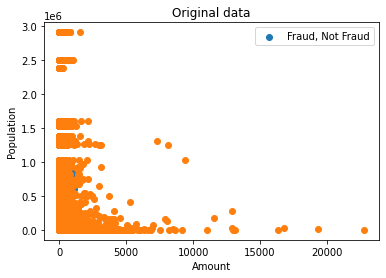

In [87]:
# before SMOTE
raw_temp = pd.concat([x_train, y_train],axis =1)
raw_temp[raw_temp['is_fraud']==1]['amt']
raw_temp[raw_temp['is_fraud']==1]['city_pop']
plt.scatter(raw_temp[raw_temp['is_fraud']==1]['amt'],raw_temp[raw_temp['is_fraud']==1]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud']==0]['amt'],raw_temp[raw_temp['is_fraud']==0]['city_pop'])
plt.legend(["Fraud, Not Fraud"])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.title('Original data')
plt.show()

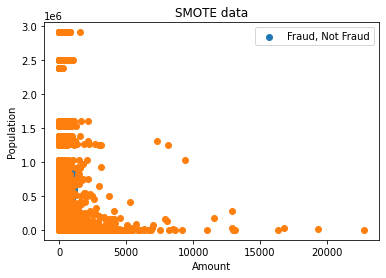

In [92]:
# after SMOTE
smote_temp = pd.concat([smote_x, smote_y],axis =1)
plt.scatter(smote_temp[smote_temp['is_fraud']==1]['amt'], smote_temp[smote_temp['is_fraud']==1]['city_pop'])
plt.scatter(smote_temp[smote_temp['is_fraud']==0]['amt'], smote_temp[smote_temp['is_fraud']==0]['city_pop'])
plt.legend(["Fraud, Not Fraud"])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.title('SMOTE data')
plt.show()